In [1]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt


In [2]:
x, y = make_regression(n_features=2, n_samples=100, noise=10)

In [3]:
print(x.shape)
print(y.shape)

(100, 2)
(100,)


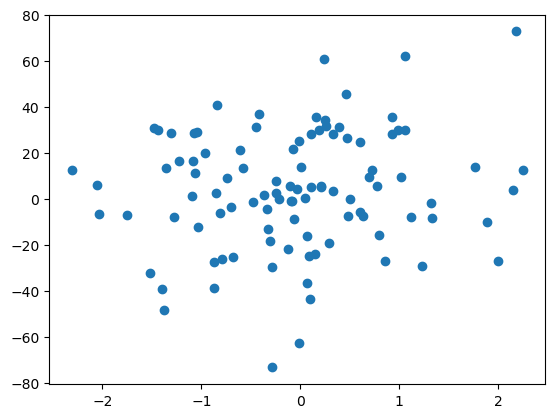

In [4]:
plt.scatter(x[:,1], y)

In [5]:
y = y.reshape(y.shape[0], 1)
y.shape

(100, 1)

In [6]:
theta = np.random.randn(3, 1)
print(theta)

[[ 2.18188067]
 [ 1.25583789]
 [-0.19738063]]


In [7]:
def model(X, theta):
    return X.dot(theta) # F = X.theta

In [8]:
np.ones(((x.shape[0]), 1))

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

In [9]:
X = np.concatenate((x, np.ones(((x.shape[0]), 1))), axis=1)
X.shape
print(X)

[[ 0.82266697  0.92521232  1.        ]
 [ 1.22052085 -1.04813816  1.        ]
 [ 0.5432566  -0.0324391   1.        ]
 [ 0.46328229  0.59957349  1.        ]
 [-0.5741372   0.06814506  1.        ]
 [ 1.01462254  0.46494738  1.        ]
 [ 1.24274654  0.98182291  1.        ]
 [ 1.71053086  0.92638709  1.        ]
 [ 0.55320153  1.7665069   1.        ]
 [-1.24514936  1.99755016  1.        ]
 [-1.98016746 -0.68011582  1.        ]
 [ 0.83130363  0.38909704  1.        ]
 [ 2.34810385  2.17903571  1.        ]
 [ 0.51771049  0.1892333   1.        ]
 [ 1.97408382 -0.4141402   1.        ]
 [-1.62197851 -0.30796074  1.        ]
 [ 0.28452302 -0.24752517  1.        ]
 [-0.69843156 -1.51935805  1.        ]
 [ 1.23471765 -0.44455038  1.        ]
 [ 1.87489549  0.26273258  1.        ]
 [-0.94687918  1.11691824  1.        ]
 [ 1.07179554  0.11039347  1.        ]
 [ 0.15303837  2.14543246  1.        ]
 [ 0.06447707  0.00906061  1.        ]
 [-0.13986023 -0.85258145  1.        ]
 [-1.18501811 -0.79533572

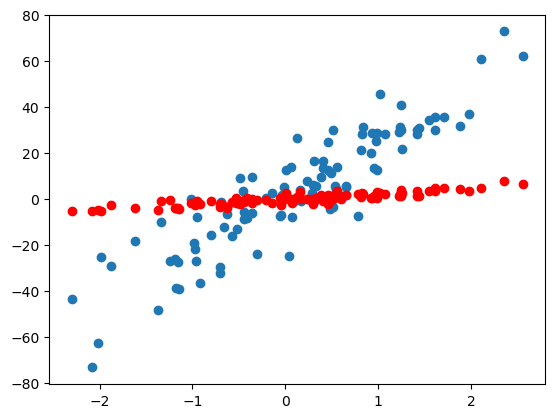

In [10]:
plt.scatter(x[:,0], y)
plt.scatter(X[:,0], model(X, theta), c='r')

In [11]:
def function_cout(X, theta, y):
    m = len(y)
    return (1/2*m) * np.sum((model(X, theta) - y)**2)

In [12]:
function_cout(X, theta, y)

2865298.424082362

In [13]:
#  gradient 
def grad(X, theta, y):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

In [14]:
grad(X, theta, y)

array([[-22.17565764],
       [ -1.85404506],
       [ -3.78629215]])

In [15]:
def gradient_descente(X, y, theta, learning_rate=0.01, n_iter=1000):
    history_cout = np.zeros(n_iter)
    for i in range(0, n_iter):
        theta = theta - learning_rate * grad(X, theta, y)
        history_cout[i] = function_cout(X, theta, y)
    return theta, history_cout


In [16]:
theta_final, history_cout = gradient_descente(X, y, theta)

In [17]:
print(theta_final)

[[22.46672999]
 [ 2.5790326 ]
 [ 1.0115881 ]]


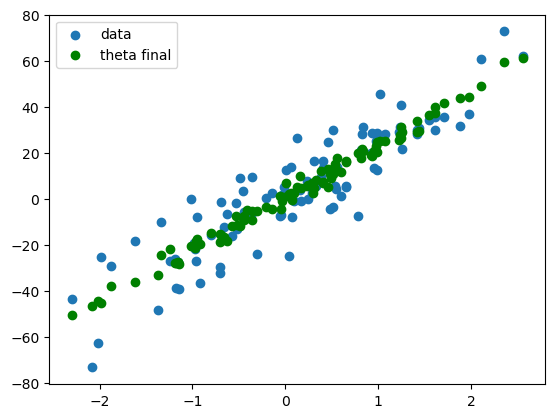

In [18]:
plt.scatter(x[:,0], y, label='data')
# plt.scatter(x[:,0], model(X, theta), c='r', label='theta initiale')
plt.scatter(x[:,0], model(X, theta_final), c='g', label='theta final')
plt.legend()

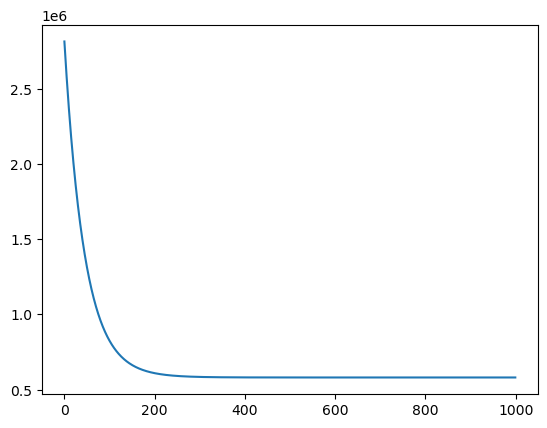

In [19]:
plt.plot(range(1000), history_cout)

In [20]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [21]:
coef_determination(y, model(X, theta_final))

0.8253808302044509